<a href="https://colab.research.google.com/github/vinnaseti/diabetes-classification-with-feature-selection/blob/main/DiabetesClassificationWithFeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Data**


Dataset used in this project is **Diabetes Dataset**. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

### **Content**
All patients in this data are females at least 21 years old of Pima Indian Heritage. The dataset features are:
Pregnancies: Number of times pregnant

*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2)
*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)
*   Outcome: Class variable (0 or 1)

# **Python Libraries**

In [ ]:
!pip install mlxtend #Library for Forward Selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 

import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# **Read and Analyse Data**

In [ ]:
path = '/content/diabetes.csv'
df = pd.read_csv(path) 

In [ ]:
# Display Dataframe
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The **Outcome** feature is our class label or target variable. Therefore, we separate the dataset from the label class

In [ ]:
# Split dataframe into data and labels (X and y)
X = df.drop(columns=['Outcome'])  # feature matrix
y = df['Outcome']                 # target variable

# **Forward Selections**

In [ ]:
# Calling the Linear Regression Model
lreg = LinearRegression()
sfs1 = SFS(lreg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error') # Define the feature selection model

In [ ]:
# Fit the feature selection model
sfs1 = sfs1.fit(X, y) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-12-08 09:27:59] Features: 1/5 -- score: -0.1788003955821145[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-12-08 09:27:59] Features: 2/5 -- score: -0.17059566071402976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-12-08 09:27:59] Features: 3/5 -- score: -0.16457097551561803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [ ]:
# Displaying the best features
features = list(sfs1.k_feature_names_)
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']


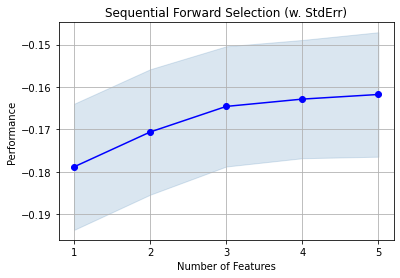

In [ ]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
# Build the second feature selector
sfs2 = SFS(lreg, k_features=3, forward=True, verbose=2, scoring='neg_mean_squared_error') # Define the feature selection model
sfs2 = sfs2.fit(X, y) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-12-08 09:27:59] Features: 1/3 -- score: -0.1788003955821145[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-12-08 09:27:59] Features: 2/3 -- score: -0.17059566071402976[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-12-08 09:27:59] Features: 3/3 -- score: -0.16457097551561803

In [ ]:
# Displaying the best features
features2 = list(sfs2.k_feature_names_)
print(features2)

['Pregnancies', 'Glucose', 'BMI']


# **Classification Modelling**

In [ ]:
# Split the code into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

Dataset is splitted into 90% Training Data and 10% Testing Data

## **Without Feature Selection**

In [ ]:
X_wfs = X_train
y_wfs = y_train
X_wfs_test = X_test

In [ ]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(X_wfs)
X_wfs = scaler.transform(X_wfs)

In [ ]:
# Calling The Support Vector Classifier
model = SVC()
model.fit(X_wfs, y_wfs)

#Scaling test data
X_wfs_test = scaler.fit_transform(X_wfs_test)

# Model Prediction on test Data
y_predict = model.predict(X_wfs_test)
print("Precision Score : %.2f" % (precision_score(y_test, y_predict)))

# Model Evaluation on test data
labelName = ['Normal', 'Diabetes']
print(classification_report(y_test, y_predict, target_names=labelName))

Precision Score : 0.82
              precision    recall  f1-score   support

      Normal       0.78      0.91      0.84        47
    Diabetes       0.82      0.60      0.69        30

    accuracy                           0.79        77
   macro avg       0.80      0.76      0.77        77
weighted avg       0.80      0.79      0.78        77



## **With Feature Selection**

**For 5 Features**

In [ ]:
X_fs = X_train[features]
y_fs = y_train
X_fs_test = X_test[features]

In [ ]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(X_fs)
X_fs = scaler.transform(X_fs)

In [ ]:
# Calling The Support Vector Classifier
model1 = SVC()
model1.fit(X_fs, y_fs)

#Scaling test data
X_fs_test = scaler.fit_transform(X_fs_test)

# Model Prediction on test Data
y_predict1 = model1.predict(X_fs_test)
print("Precision Score : %.2f" % (precision_score(y_test, y_predict1)))

# Model Evaluation on test data
labelName = ['Normal', 'Diabetes']
print(classification_report(y_test, y_predict1, target_names=labelName))

Precision Score : 0.82
              precision    recall  f1-score   support

      Normal       0.78      0.91      0.84        47
    Diabetes       0.82      0.60      0.69        30

    accuracy                           0.79        77
   macro avg       0.80      0.76      0.77        77
weighted avg       0.80      0.79      0.78        77



**For 3 Features**

In [ ]:
X_fs2 = X_train[features2]
y_fs2 = y_train
X_fs2_test = X_test[features2]

In [ ]:
# Data Scaling
scaler = StandardScaler()
scaler.fit(X_fs2)
X_fs2 = scaler.transform(X_fs2)

In [ ]:
# Calling The Support Vector Classifier
model2 = SVC()
model2.fit(X_fs2, y_fs2)

#Scaling test data
X_fs2_test = scaler.fit_transform(X_fs2_test)

# Model Prediction on test Data
y_predict2 = model2.predict(X_fs2_test)
print("Precision Score : %.2f" % (precision_score(y_test, y_predict2)))

# Model Evaluation on test data
labelName = ['Normal', 'Diabetes']
print(classification_report(y_test, y_predict2, target_names=labelName))

Precision Score : 0.79
              precision    recall  f1-score   support

      Normal       0.74      0.91      0.82        47
    Diabetes       0.79      0.50      0.61        30

    accuracy                           0.75        77
   macro avg       0.77      0.71      0.72        77
weighted avg       0.76      0.75      0.74        77

